# TEAM ID - PNT2022TMID44333

### DEVELOPING A FLIGHT DELAY PREDICTION USING ML

#### Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import joblib

#### Import the Dataset

In [3]:
df = pd.read_csv("C:/Users/vigne/Downloads/flightdata.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


#### Analyze the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

#### Dropping Unnecessary Columns

In [5]:
df = df[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_ARR_TIME', 'DEP_DEL15', 'ARR_DEL15']]
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,2143,0.0,0.0
1,1476,1,1,5,DTW,MSP,1435,0.0,0.0
2,1597,1,1,5,ATL,SEA,1215,0.0,0.0
3,1768,1,1,5,SEA,MSP,1335,0.0,0.0
4,1823,1,1,5,SEA,DTW,607,0.0,0.0


#### Handling Missing Values

#### Checking for null values

In [6]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
CRS_ARR_TIME    False
DEP_DEL15        True
ARR_DEL15        True
dtype: bool

#### Replacing Null Values

In [7]:
df.fillna(df['DEP_DEL15'].mode()[0], inplace=True)
df.fillna(df['ARR_DEL15'].mode()[0], inplace=True)

In [8]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
CRS_ARR_TIME    False
DEP_DEL15       False
ARR_DEL15       False
dtype: bool

<AxesSubplot:>

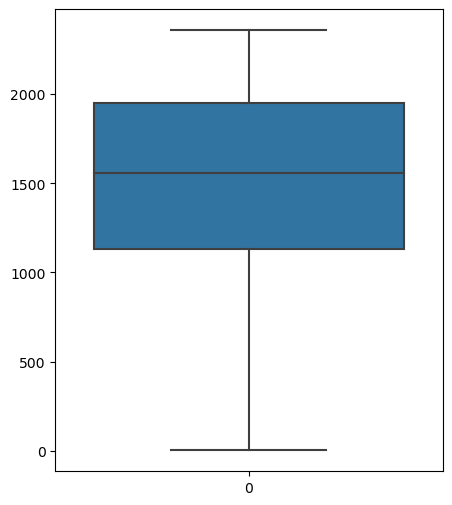

In [9]:
fig, ax = plt.subplots(figsize=(5, 6))
sb.boxplot(data=df['CRS_ARR_TIME'])

#### Label Encoding & One Hot Encoding

In [10]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,2143,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,1435,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,1215,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,1335,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,607,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [11]:
df.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ARR_TIME',
       'DEP_DEL15', 'ARR_DEL15', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK',
       'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL', 'DEST_DTW', 'DEST_JFK',
       'DEST_MSP', 'DEST_SEA'],
      dtype='object')

#### Splitting The Dataset Into Dependent And Independent Variables

In [22]:
X = df.drop(columns=['ARR_DEL15'])
Y = df[['ARR_DEL15']]

In [23]:
X = pd.DataFrame(scale(X), columns=X.columns)
X.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,0.079664,-1.678022,-1.684277,0.521159,1.205371,-0.405955,1.619538,-0.493703,-0.373354,-0.540332,-0.468015,-0.634131,-0.495098,-0.363691,-0.534140,2.152300
1,0.174510,-1.678022,-1.684277,0.521159,-0.203612,-0.405955,-0.617460,2.025507,-0.373354,-0.540332,-0.468015,-0.634131,-0.495098,-0.363691,1.872168,-0.464619
2,0.323555,-1.678022,-1.684277,0.521159,-0.641431,-0.405955,1.619538,-0.493703,-0.373354,-0.540332,-0.468015,-0.634131,-0.495098,-0.363691,-0.534140,2.152300
3,0.534188,-1.678022,-1.684277,0.521159,-0.402620,-0.405955,-0.617460,-0.493703,-0.373354,-0.540332,2.136682,-0.634131,-0.495098,-0.363691,1.872168,-0.464619
4,0.601935,-1.678022,-1.684277,0.521159,-1.851405,-0.405955,-0.617460,-0.493703,-0.373354,-0.540332,2.136682,-0.634131,2.019802,-0.363691,-0.534140,-0.464619


In [24]:
X = X.values
Y = Y.values

#### Split the dataset into Train set and Test set

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8984, 16), (2247, 16), (8984, 1), (2247, 1))

## BUILDING THE MODEL

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train.ravel())

LogisticRegression()

#### Support Vector Classifier

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train.ravel())

SVC()

#### KNN Classifier


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier()

#### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, max_depth=3)
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=15)

#### Testing the Models

#### Logistic Regression

In [31]:
Y_pred_log_train = log_reg.predict(X_train)
Y_pred_log_test = log_reg.predict(X_test)

In [32]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    7707
1.0    1277
dtype: int64

In [33]:
pd.DataFrame(Y_pred_log_test).value_counts()

0.0    1959
1.0     288
dtype: int64

#### Support Vector Classifier

In [34]:
Y_pred_svc_train = svc.predict(X_train)
Y_pred_svc_test = svc.predict(X_test)

In [35]:
pd.DataFrame(Y_pred_svc_train).value_counts()

0.0    7733
1.0    1251
dtype: int64

In [36]:
pd.DataFrame(Y_pred_svc_test).value_counts()

0.0    1965
1.0     282
dtype: int64

#### KNN Classifier

In [39]:
Y_pred_knn_train = knn.predict(X_train)
Y_pred_knn_test = knn.predict(X_test)

C:\Users\vigne\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vigne\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [40]:
pd.DataFrame(Y_pred_knn_train).value_counts()

0.0    7977
1.0    1007
dtype: int64

In [41]:
pd.DataFrame(Y_pred_knn_test).value_counts()

0.0    2022
1.0     225
dtype: int64

#### Random Forest Classifier

In [42]:
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)

In [43]:
pd.DataFrame(Y_pred_rf_train).value_counts()

0.0    8971
1.0      13
dtype: int64

In [44]:
pd.DataFrame(Y_pred_rf_test).value_counts()

0.0    2246
1.0       1
dtype: int64

## EVALUATION OF MODEL

#### Logistic Regression

##### Classification Report

In [45]:
print(classification_report(Y_test, Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1976
         1.0       0.67      0.71      0.69       271

    accuracy                           0.92      2247
   macro avg       0.82      0.83      0.82      2247
weighted avg       0.93      0.92      0.92      2247



##### Accuracy, Precision, Recall, F1 Score

In [46]:
acc_log = accuracy_score(Y_test, Y_pred_log_test)
prec_log, rec_log, f1_log, sup_log = precision_recall_fscore_support(Y_test, Y_pred_log_test)
print('Accuracy Score =', acc_log)
print('Precision =', prec_log[0])
print('Recall =', rec_log[0])
print('F1 Score =', f1_log[0])

Accuracy Score = 0.9230084557187361
Precision = 0.9601837672281777
Recall = 0.9519230769230769
F1 Score = 0.9560355781448538


##### Checking for Overfitting and Underfitting

In [47]:
log_train_acc = accuracy_score(Y_train, Y_pred_log_train)
log_test_acc = accuracy_score(Y_test, Y_pred_log_test)
print('Training Accuracy =', log_train_acc)
print('Testing Accuracy =', log_test_acc)

Training Accuracy = 0.9199688334817453
Testing Accuracy = 0.9230084557187361


##### Confusion Matrix

In [48]:
pd.crosstab(Y_test.ravel(), Y_pred_log_test)

col_0,0.0,1.0
row_0,,
0.0,1881,95
1.0,78,193


#### Support Vector Classifier

##### Classification Report

In [49]:
print(classification_report(Y_test, Y_pred_svc_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1976
         1.0       0.68      0.71      0.69       271

    accuracy                           0.92      2247
   macro avg       0.82      0.83      0.83      2247
weighted avg       0.93      0.92      0.93      2247



##### Accuracy, Precision, Recall, F1 Score

In [50]:
acc_svc = accuracy_score(Y_test, Y_pred_svc_test)
prec_svc, rec_svc, f1_svc, sup_svc = precision_recall_fscore_support(Y_test, Y_pred_svc_test)
print('Accuracy Score =', acc_svc)
print('Recall =', rec_svc[0])
print('F1 Score =', f1_svc[0])

Accuracy Score = 0.9247886070315977
Recall = 0.9544534412955465
F1 Score = 0.9571174828723674


##### Checking for Overfitting and Underfitting


In [51]:
svc_train_acc = accuracy_score(Y_train, Y_pred_svc_train)
svc_test_acc = accuracy_score(Y_test, Y_pred_svc_test)
print('Training Accuracy =', svc_train_acc)
print('Testing Accuracy =', svc_test_acc)

Training Accuracy = 0.9230854853072128
Testing Accuracy = 0.9247886070315977


##### Confusion Matrix

In [52]:
pd.crosstab(Y_test.ravel(), Y_pred_svc_test)

col_0,0.0,1.0
row_0,,
0.0,1886,90
1.0,79,192


#### KNN Classifier

##### Classification Report

In [53]:
print(classification_report(Y_test, Y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1976
         1.0       0.68      0.57      0.62       271

    accuracy                           0.92      2247
   macro avg       0.81      0.77      0.79      2247
weighted avg       0.91      0.92      0.91      2247



##### Accuracy, Precision, Recall, F1 Score

In [54]:
acc_knn = accuracy_score(Y_test, Y_pred_knn_test)
prec_knn, rec_knn, f1_knn, sup_knn = precision_recall_fscore_support(Y_test, Y_pred_knn_test)
print('Accuracy Score =', acc_knn)
print('Precision =', prec_knn[0])
print('Recall =', rec_knn[0])
print('F1 Score =', f1_knn[0])

Accuracy Score = 0.9163328882955051
Precision = 0.9421364985163204
Recall = 0.9640688259109311
F1 Score = 0.952976488244122


##### Checking for Overfitting and Underfitting

In [55]:
knn_train_acc = accuracy_score(Y_train, Y_pred_knn_train)
knn_test_acc = accuracy_score(Y_test, Y_pred_knn_test)
print('Training Accuracy =', knn_train_acc)
print('Testing Accuracy =', knn_test_acc)

Training Accuracy = 0.9335485307212823
Testing Accuracy = 0.9163328882955051


##### Confusion Matrix

In [56]:
pd.crosstab(Y_test.ravel(), Y_pred_knn_test)

col_0,0.0,1.0
row_0,,
0.0,1905,71
1.0,117,154


#### Random Forest Classifier

##### Classification Report

In [57]:
print(classification_report(Y_test, Y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1976
         1.0       1.00      0.00      0.01       271

    accuracy                           0.88      2247
   macro avg       0.94      0.50      0.47      2247
weighted avg       0.89      0.88      0.82      2247



##### Accuracy, Precision, Recall, F1 Score

In [58]:
acc_rf = accuracy_score(Y_test, Y_pred_rf_test)
prec_rf, rec_rf, f1_rf, sup_rf = precision_recall_fscore_support(Y_test, Y_pred_rf_test)
print('Accuracy Score =', acc_rf)
print('Precision =', prec_rf[0])
print('Recall =', rec_rf[0])
print('F1 Score =', f1_rf[0])

Accuracy Score = 0.8798397863818425
Precision = 0.8797862867319679
Recall = 1.0
F1 Score = 0.9360492657508289


##### Checking for Overfitting and Underfitting


In [59]:
rf_train_acc = accuracy_score(Y_train, Y_pred_rf_train)
rf_test_acc = accuracy_score(Y_test, Y_pred_rf_test)
print('Training Accuracy =', rf_train_acc)
print('Testing Accuracy =', rf_test_acc)

Training Accuracy = 0.8785618878005342
Testing Accuracy = 0.8798397863818425


##### Confusion Matrix



In [60]:
pd.crosstab(Y_test.ravel(), Y_pred_rf_test)

col_0,0.0,1.0
row_0,,
0.0,1976,0
1.0,270,1


#### Dumping the Chosen Model into pkl file

In [61]:
joblib.dump(svc, 'model.pkl')

['model.pkl']